# Python을 이용한 확률 계산 실습

## 1. 이항 분포

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

In [4]:
n=5
for i in range(n+1):
    prob=stats.binom.pmf(k=i,n=n,p=0.3)
    print("P(X={0})={1:.3f}".format(i,prob))

P(X=0)=0.168
P(X=1)=0.360
P(X=2)=0.309
P(X=3)=0.132
P(X=4)=0.028
P(X=5)=0.002


### 도장공정에서 광택도 불량이 30%일 때, 5대의 차량을 임의로 선택할 경우 불량대수가 0,1,2,3,4,5대일 확률

# Python을 이용한 정규성 검정 실습

## 2. 정규성 검정

In [5]:
ds_sample=pd.read_csv('/home/piai/다운로드/bigdata/2sample_t_test.csv')
ds_sample.head()

Mat_A  Mat_B  Total  Sub
0   73.4   68.7   73.4    1
1   77.0   71.4   77.0    1
2   73.7   69.8   73.7    1
3   73.3   75.3   73.3    1
4   73.1   71.3   73.1    1

In [6]:
df_df=ds_sample[(ds_sample["Mat_A"].notnull())]

In [7]:
data1=df_df['Mat_A']

In [8]:
data2=df_df['Mat_B']

In [9]:
df_df

Mat_A  Mat_B  Total  Sub
0   73.4   68.7   73.4    1
1   77.0   71.4   77.0    1
2   73.7   69.8   73.7    1
3   73.3   75.3   73.3    1
4   73.1   71.3   73.1    1
5   71.5   72.7   71.5    1
6   74.5   66.9   74.5    1
7   77.5   70.2   77.5    1
8   76.4   74.4   76.4    1
9   77.7   70.1   77.7    1

In [10]:
statistic,p=stats.shapiro(data1)
print("Shapiro-Wilk Test: statistic={},p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.906264066696167,p-value=0.2563020884990692


### 정규성 검정결과(95% 신뢰수준 사용시) p-value가 0.05보다 크면 정규, 0.05보다 작으면 비정규로 판단

### 변수 Mat_A의 p-value는 약 0.256이므로 정규분포를 따른다고 판단한다.

In [11]:
statistic,p=stats.shapiro(data2)
print("Shapiro-Wilk Test: statistic={},p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.9729753732681274,p-value=0.9169775247573853


### 변수 Mat_B의 p-value는 약 0.917이므로 정규분포를 따른다고 판단한다.

# Python을 이용한 구간추정 실습 

## 3. 모평균 구간추정

In [12]:
df=pd.DataFrame({"sample":[18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})
df.head()

sample
0      18
1      18
2      20
3      21
4      20

In [13]:
lower,upper=stats.norm.interval(0.95,loc=np.mean(df),scale=3.8/np.sqrt(20))

/home/piai/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [14]:
print("신뢰구간:({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간:([17.83],[21.17])


### 추정하고자 하는 모평균이 [17.83,21.17] 구간에 포함될 확률이 95% (모표준편차 3.8)

## 4. 모평균(μ) 신뢰구간 추정

In [15]:
df2=pd.DataFrame({'sample':[73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,70,75,72]})

In [16]:
lower2,upper2=stats.t.interval(0.95,len(df2)-1,loc=np.mean(df2),scale=stats.sem(df2))
print("신뢰구간:({0},{1})".format(lower2.round(2),upper2.round(2)))

신뢰구간:([70.6],[72.4])


### 모표준편차를 모르는 경우, 표본으로부터 표준편차를 추정하여 추정하고자 하는 모평균이 [70.6, 72.4] 구간에 포함될 확률이 95%

# Python을 이용한 가설검정 실습

## 5. 추론 통계(실습 1-Sample t-test)

### step 1.
### 귀무가설(H$_0$) :  개선활동이 고객만족도를 변화시키지 않았다.
### 대립가설(H$_1$) :  개선활동이 고객만족도를 변화시켰다.
### 유의수준(α) : 0.05

<AxesSubplot:>

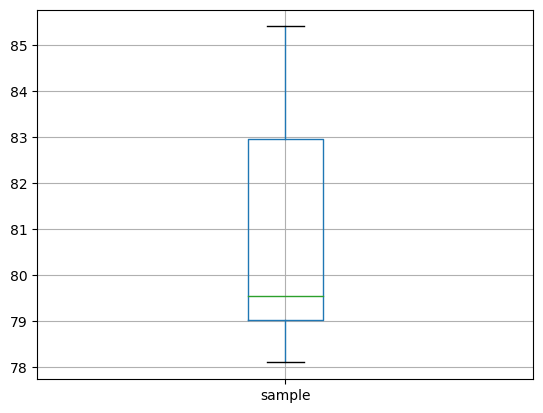

In [17]:
df3=pd.DataFrame({'sample':[85.0, 79.0, 79.1, 79.9,81.6,78.6,85.4,83.4,78.1,79.2]})
df3.boxplot(['sample'])

### step 2. <정규성 검정>
### 귀무가설(H$_0$) : 고객만족도 표본의 모집단은 정규분포를 따른다.
### 대립가설(H$_1$) : 고객만족도 표본의 모집단은 정규분포를 따르지 않는다.
### 유의수준(α) : 0.05

In [18]:
statistic,p=stats.shapiro(df3['sample'])
print("Shapiro-Wilk Test: statistic={},p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.8473217487335205,p-value=0.0539751797914505


### 정규성 검정결과(95% 신뢰수준 사용시) 정규분포를 따른다고 판단(귀무가설 채택)

### step 3. 모표준편차를 알지 못하므로 t-분포로 모평균추정

In [19]:
t_result=stats.ttest_1samp(df3,78.0)

In [20]:
t,p=t_result.statistic.round(3),t_result.pvalue.round(3)

In [21]:
print("1-Sample t-test")
print(" t 통계량 : {}".format(t))
print(" p-value : {}".format(p))

1-Sample t-test
 t 통계량 : [3.379]
 p-value : [0.008]


### step 4. 결론
### 유의수준 5%에서 검정결과 p값이 0.008이고,  
### 검정통계량이 양수이므로 개선활동이 고객만족도를 증가시켰다.(대립가설 채택)

## 6. 추론 통계(실습 2-Sample t-test)
### step 1.
### 귀무가설(H$_0$) :  A, B 공급자 간에 제품 두께 차이가 없다.
### 대립가설(H$_1$) :  A, B 공급자 간에 제품 두께 차이가 있다.
### 유의수준(α) : 0.05

In [22]:
table={"Supplier":['B','B','B','A','A','A','B','B','B','A','A','A','A','A','B','B'],"Thickness":[1.435,1.572,1.486,1.883,1.715,1.799,1.511,1.457,1.548,1.768,1.711,1.832,1.427,1.344,1.404,1.883]}

In [23]:
df1=pd.DataFrame(table)
df1

Supplier  Thickness
0         B      1.435
1         B      1.572
2         B      1.486
3         A      1.883
4         A      1.715
5         A      1.799
6         B      1.511
7         B      1.457
8         B      1.548
9         A      1.768
10        A      1.711
11        A      1.832
12        A      1.427
13        A      1.344
14        B      1.404
15        B      1.883

In [24]:
df_A=df1[(df1["Supplier"]=="A")]
df_B=df1[(df1["Supplier"]=="B")]
df_a=df_A['Thickness'].to_list()
df_b=df_B['Thickness'].to_list()

<AxesSubplot:>

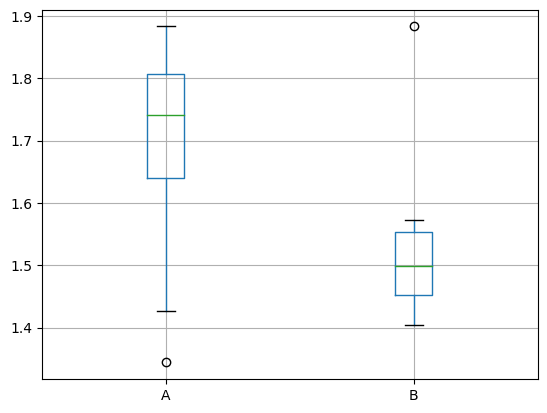

In [25]:
df=pd.DataFrame({'A':df_a,'B':df_b})
df.boxplot(['A','B'])

### step 2. <정규성 검정>
### 귀무가설(H$_0$) : 각 표본의 모집단은 정규분포를 따른다.
### 대립가설(H$_1$) : 각 표본의 모집단은 정규분포를 따르지 않는다.
### 유의수준(α) : 0.05

In [26]:
#A,B 정규성 검정
statistic,p=stats.shapiro(df['A'])
print("Shapiro-Wilk Test: statistic={},p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.8425754904747009,p-value=0.08004532009363174


### A 공급자 표본의 모집단은 정규분포를 따른다.

In [27]:
statistic,p=stats.shapiro(df['B'])
print("Shapiro-Wilk Test: statistic={},p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.7734811902046204,p-value=0.014793740585446358


### B 공급자 표본의 모집단은 정규분포를 따르지 않는다.

### step 3. 비모수검정
### 귀무가설(H$_0$)  : A의 순위 평균은 B의 것과 같음.
### 대립가설(H$_1$) : A의 순위 평균은 B의 것과 다름.
### 유의수준(α) : 0.05

In [28]:
#비모수검정 실행
stats.mannwhitneyu(df['A'],df['B'])

MannwhitneyuResult(statistic=43.5, pvalue=0.24764784610289658)

### A의 순위 평균은 B의 것과 같다고 판단한다.

### step 4. 결론

### 유의수준 5%에서 검정결과 p값이 약 0.248이므로 공급자 간에 제품 두께의 차이가 없다고 본다.

### B는 정규분포를 따르지 않지만 따른다고 가정, 등분산성 검정 수행
### step 3'. < 등분산성 검정>
### 귀무가설(H$_0$): 두 집단(A,B 제품 두께)의 분산은 차이가 없다.
### 대립가설(H$_1$): 두 집단(A,B 제품 두께)의 분산은 차이가 있다.
### 유의수준(α) : 0.05

In [29]:
#등분산성 검정
stats.bartlett(df['A'],df['B'])

BartlettResult(statistic=0.42411436523132123, pvalue=0.5148911629500761)

### 두 집단의 분산은 차이가 없다.(귀무가설 채택)

### step 4' 모표준편차를 알지 못하므로 t-분포로 모평균추정

In [30]:
t_result=stats.ttest_ind(df['A'],df['B'])
t,p=t_result.statistic.round(3),t_result.pvalue.round(3)

In [31]:
print("2-Sample t-test")
print(" t : {}".format(t))
print(" p : : {}".format(p))

2-Sample t-test
 t : 1.7
 p : : 0.111


### step 4'. 결론
### 검정통계량이 양수이므로 A 공급자의 제품 두께가 두껍지만 유의수준 5%에서 검정결과 p값이 0.111이므로 공급자 간에 제품 두께의 차이가 없다고 본다.

## 7. 추론 통계(Paired t-test)

### step 1.
### 귀무가설(H$_0$) :  학원 수강 전후 점수 차이가 없다.
### 대립가설(H$_1$) :  학원 수강 전후 점수 차이가 있다.
### 유의수준(α) : 0.05

In [32]:
df1=pd.DataFrame({"before":[720,589,780,648,720,589,780,648,780,648]})
df2=pd.DataFrame({ "after":[710,580,787,712,750,600,782,670,790,680]})

### step 2. <정규성 검정>
### 귀무가설(H$_0$) : 각 표본의 모집단은 정규분포를 따른다.
### 대립가설(H$_1$) : 각 표본의 모집단은 정규분포를 따르지 않는다.
### 유의수준(α) : 0.05

In [33]:
#전,후 정규성 검정
statistic,p=stats.shapiro(df1['before'])
print("Shapiro-Wilk Test: statistic={},p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.8713098764419556,p-value=0.10353978723287582


### before 표본의 모집단은 정규분포를 따른다.

In [34]:
statistic,p=stats.shapiro(df2['after'])
print("Shapiro-Wilk Test: statistic={},p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.9132594466209412,p-value=0.304139107465744


### after 표본의 모집단은 정규분포를 따른다.

### 두 표본이 모두 정규분포를 따르므로 등분산성 검정 수행
### step 3. < 등분산성 검정>
### 귀무가설(H$_0$): 두 집단의 분산은 차이가 없다.
### 대립가설(H$_1$): 두 집단의 분산은 차이가 있다.
### 유의수준(α) : 0.05

In [35]:
#등분산성 검정
stats.bartlett(df1['before'],df2['after'])

BartlettResult(statistic=0.001439637370944973, pvalue=0.9697334846225945)

### p값이 0.05보다 크므로 두 집단의 분산은 차이가 없다.(귀무가설 채택)

### step 4. 모표준편차를 알지 못하므로 t-분포로 모평균추정

In [36]:
t_result=stats.ttest_rel(df1,df2)
t,p=t_result.statistic.round(3),t_result.pvalue.round(5)

In [37]:
print("Paired t-test")
print(" t : {}".format(t))
print(" p : : {}".format(p))

Paired t-test
 t : [-2.266]
 p : : [0.04968]


### step 5. 결론
### 유의수준 5%에서 검정결과 P값이 0.04968이므로 학원 수강 전후의 점수는 차이가 있다고 판단하며, 검정통계량이 음수이므로 점수는 증가했다.

## 8. 추론 통계(1 Proportion test)

### 귀무가설(H$_0$) :  동전이 정상 동전과 차이가 없다.(정상 동전에서 앞면이 나올 확률이 검사 동전에서의 확률과 같다)
### 대립가설(H$_1$) :  동전이 정상 동전과 차이가 있다.(정상 동전에서 앞면이 나올 확률이 검사 동전에서의 확률과 다르다)
### 유의수준(α) : 0.05

In [38]:
count=40
n_obs=100
value=0.5

In [39]:
stat,pval=proportions_ztest(count,n_obs,value)

In [40]:
print("1 Proportion test")
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

1 Proportion test
z:-2.041
p:0.041


### 동전은 정상 동전과 차이가 있으며 z값이 음수이므로 정상 동전보다 앞면이 나올 확률이 낮음을 알 수 있다.

## 9. 추론 통계(2 Proportion test)

### 귀무가설(H$_0$) :  두 공정의 불량률은 차이가 없다.
### 대립가설(H$_1$) :  두 공정의 불량률은 차이가 있다.
### 유의수준(α) : 0.05

In [41]:
count=np.array([14,5])
nobs=np.array([1200,1200])
stat,pval=proportions_ztest(count,nobs)

In [42]:
print("2 Proportion test")
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

2 Proportion test
z:2.073
p:0.038


### 두 공정의 불량률은 차이가 있으며 z값이 양수이므로 A 공장의 불량률이 더 높다고 판단한다.

## 10. 카이제곱 검정

### 귀무가설(H$_0$) : 각 노트북 제품에 대해 이미지 차이가 없다.
### 대립가설(H$_1$) : 각 노트북 제품에 대해 이미지 차이가 있다.
### 유의수준(α) : 0.05

In [43]:
df=pd.DataFrame({'A':[18,1,8,7,10,9,10], 'B':[8,2,14,5,5,9,4],'C':[4,1,2,3,2,7,3],'D':[4,1,2,3,2,7,3],'E':[3,1,3,1,1,1,1],'F':[3,25,8,10,2,1,7]})

In [44]:
chi,pval,dof,expected=stats.chi2_contingency(df)
print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print("p:{0:0.3f}".format(pval))
print("degree pf freedom:{}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

chi-square test
chisq:90.432
p:0.000
degree pf freedom:30
expected value: 
[[11.403  8.507  3.982  3.982  1.991 10.136]
 [ 8.837  6.593  3.086  3.086  1.543  7.855]
 [10.548  7.869  3.683  3.683  1.842  9.376]
 [ 8.267  6.167  2.887  2.887  1.443  7.348]
 [ 6.271  4.679  2.19   2.19   1.095  5.575]
 [ 9.692  7.231  3.385  3.385  1.692  8.615]
 [ 7.982  5.955  2.787  2.787  1.394  7.095]]


### 유의수준 5%에서 각 노트북 제품에 대해 이미지 차이가 있다.

## 11.ANOVA

### 강종별 평균 2차 정련 시간 ANOVA 분석
### 귀무가설(H$_0$) : 세 그룹 간의 강종별 평균 2차 정련 시간 평균 차이가 없다.
### 대립가설(H$_1$) : 세 그룹 중 적어도 한 그룹에서 강종별 평균 2차 정련 시간 평균 차이가 있다.

In [45]:
ds_an=pd.read_csv('/home/piai/다운로드/bigdata/ANOVA.csv')
ds_an

time charge gangjong type
0   32.2      A        a    a
1   30.4      B        a    a
2   33.6      C        a    a
3   36.4      D        a    a
4   33.9      E        a    a
5   34.9      F        a    a
6   33.1      A        b    a
7   29.9      B        b    a
8   31.7      C        b    a
9   27.5      D        b    a
10  34.0      E        b    a
11  30.7      F        b    a
12  32.6      A        c    b
13  32.7      B        c    b
14  29.3      C        c    b
15  25.9      D        c    b
16  31.1      E        c    b
17  23.8      F        c    b
18  26.7      A        d    b
19  28.5      B        d    b
20  30.9      C        d    b
21  26.2      D        d    b
22  32.3      E        d    b
23  23.7      F        d    b

In [46]:
gang=ds_an.groupby(by=['gangjong'])['time'].apply(list).to_dict()
tp=ds_an.groupby(by=['type'])['time'].apply(list).to_dict()

In [47]:
df1=pd.DataFrame(gang)
df2=pd.DataFrame(tp)
df1

a     b     c     d
0  32.2  33.1  32.6  26.7
1  30.4  29.9  32.7  28.5
2  33.6  31.7  29.3  30.9
3  36.4  27.5  25.9  26.2
4  33.9  34.0  31.1  32.3
5  34.9  30.7  23.8  23.7

In [48]:
df2

a     b
0   32.2  32.6
1   30.4  32.7
2   33.6  29.3
3   36.4  25.9
4   33.9  31.1
5   34.9  23.8
6   33.1  26.7
7   29.9  28.5
8   31.7  30.9
9   27.5  26.2
10  34.0  32.3
11  30.7  23.7

<AxesSubplot:>

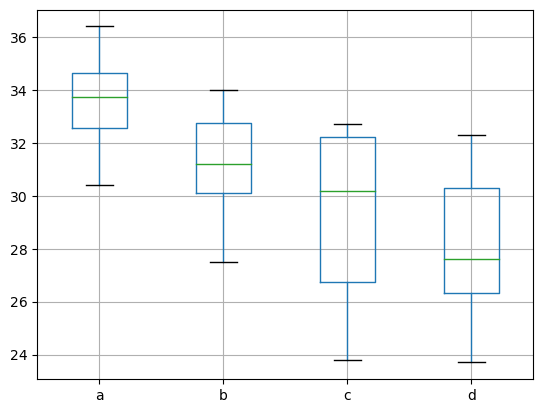

In [49]:
df1.boxplot(['a','b','c','d'])

### 정규성 검정
### 귀무가설(H$_0$) : 각 표본의 모집단은 정규분포를 따른다.
### 대립가설(H$_1$) : 각 표본의 모집단은 정규분포를 따르지 않는다.

In [50]:
statistic,p=stats.shapiro(df1['a'])
print("Shapiro-Wilk Test: statistic={},p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.9879403114318848,p-value=0.983557939529419


In [51]:
statistic,p=stats.shapiro(df1['b'])
print("Shapiro-Wilk Test: statistic={},p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.9769707918167114,p-value=0.9355478286743164


In [52]:
statistic,p=stats.shapiro(df1['c'])
print("Shapiro-Wilk Test: statistic={},p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.8929420113563538,p-value=0.3338908553123474


In [53]:
statistic,p=stats.shapiro(df1['d'])
print("Shapiro-Wilk Test: statistic={},p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.9713904857635498,p-value=0.901641845703125


### 강종 a,b,c,d의 2차정련 시간 분포는 정규분포를 따른다.

### < 등분산성 검정>
### 귀무가설(H$_0$): 네 집단의 분산은 차이가 없다.
### 대립가설(H$_1$): 네 집단의 분산 중 적어도 하나의 집단의 분산은 차이가 있다.
### 유의수준(α) : 0.05

In [54]:
stats.levene(df1['a'],df1['b'],df1['c'],df1['d'])

LeveneResult(statistic=0.9417495009041227, pvalue=0.4390899931524723)

### 네 집단의 분산은 차이가 없다고 판단한다.

### <ANOVA 실행>

In [55]:
f_result=stats.f_oneway(df1['a'],df1['b'],df1['c'],df1['d'])
f,p=f_result.statistic.round(3), f_result.pvalue.round(3)

In [56]:
print("One-way")
print("F 통계량 : {}".format(f))
print("p-value: {}".format(p))

One-way
F 통계량 : 4.172
p-value: 0.019


### 결론 : 유의수준 5%에서 네 그룹 간 강종별 평균 2차 정련 시간 차이는 있다고 판단한다.

### type별 평균 2차 정련 시간 ANOVA 분석
### 귀무가설(H$_0$) : 세 그룹 간의 type별 평균 2차 정련 시간 평균 차이가 없다.
### 대립가설(H$_1$) : 세 그룹 중 적어도 한 그룹에서 type별 평균 2차 정련 시간 평균 차이가 있다.

<AxesSubplot:>

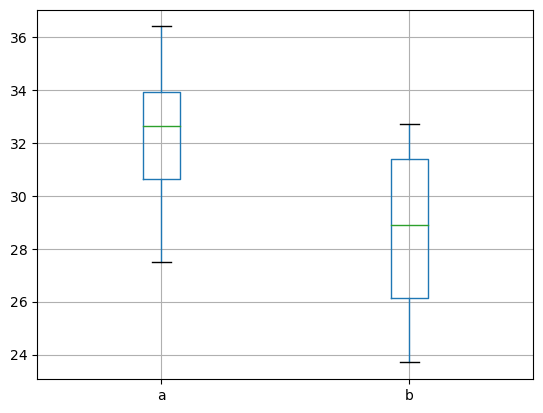

In [57]:
df2.boxplot(['a','b'])

### 정규성 검정
### 귀무가설(H$_0$) : 각 표본의 모집단은 정규분포를 따른다.
### 대립가설(H$_1$) : 각 표본의 모집단은 정규분포를 따르지 않는다.

In [58]:
statistic,p=stats.shapiro(df2['a'])
print("Shapiro-Wilk Test: statistic={},p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.982139527797699,p-value=0.9907686114311218


In [59]:
statistic,p=stats.shapiro(df2['b'])
print("Shapiro-Wilk Test: statistic={},p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.9098271131515503,p-value=0.2122616022825241


### type a,b의 2차정련 시간 분포는 정규분포를 따른다.

### < 등분산성 검정>
### 귀무가설(H$_0$): 세 집단의 분산은 차이가 없다.
### 대립가설(H$_1$): 세 집단의 분산 중 적어도 하나의 집단의 분산은 차이가 있다.
### 유의수준(α) : 0.05

In [60]:
stats.levene(df2['a'],df2['b'])

LeveneResult(statistic=2.1557191195451235, pvalue=0.1561933555382328)

### 두 집단의 분산은 차이가 없다고 판단한다.

### <ANOVA 실행>

In [61]:
f_result=stats.f_oneway(df2['a'],df2['b'])
f,p=f_result.statistic.round(3), f_result.pvalue.round(3)

In [62]:
print("One-way")
print("F 통계량 : {}".format(f))
print("p-value: {}".format(p))

One-way
F 통계량 : 9.654
p-value: 0.005


### 결론 : 유의수준 5%에서 두 그룹 간 type별 평균 2차 정련 시간 차이는 있다고 판단한다.

## 12. Correlation Analysis
### 귀무가설(H$_0$) : 상관계수는 0이다.
### 대립가설(H$_1$) : 상관계수는 0이 아니다.
### 유의수준(α) : 0.05

In [63]:
df1=[37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
df2=[14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]
corr,pval=stats.pearsonr(df1,df2)

In [64]:
print("Correlation Analysis")
print("corr : {0:0.3f}".format(corr))
print("p-value: {0:0.3f}".format(pval))

Correlation Analysis
corr : -0.723
p-value: 0.000


### 유의수준 5%에서 초코칩의 강도와 재료 반죽온도간에 음의 상관 관계가 있다.